<a href="https://colab.research.google.com/github/GAVSH25/iad-deep-learning/blob/master/%D0%93%D0%B0%D0%B2%D1%88%D0%B8%D0%BD%D0%B0_%D0%95%D0%BB%D0%B8%D0%B7%D0%B0%D0%B2%D0%B5%D1%82%D0%B0_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_%D0%BF%D0%B0%D1%80%D0%BE%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

	
Напишите Python-функцию для проверки качества пароля в Яндекс.Почте. Хорошим считается пароль, который соответствует условиям:
*   длина не менее 7 символов,
*   содержит хотя бы 1 цифру,
*   содержит хотя бы 1 букву верхнего регистра,
*   содержит хотя бы 1 букву нижнего регистра,
*   содержит только латинские буквы и цифры,
*   не содержит повторяющиеся символы.

In [1]:
#импортируем нужный модуль
import re

In [ ]:
#простое решение, не учитываем условие повтора
def main():
  password = input("Введите пароль\n")
  allowed = "^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[@#$%^&*()-+!?])[A-Za-z\d@#$%^&*()-+!?]{7,100}$"
  pattern = re.compile(allowed) #строка регулярного выражения
  mat = re.search(pattern, password)

  if mat:
    print("Пароль надежный")
  else:
    print("Пароль ненадежный")

if __name__ == "__main__":
  main()

Введите пароль
cfgvhbjnk
Пароль ненадежный


In [3]:
#учитываем условие повтора
def check_password (password):  

  allowed = "^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[@#$%^&*()-+!?])[A-Za-z\d@#$%^&*()-+!?]{7,100}$" #набор нужных нам символов
  pattern = re.compile(allowed) #строка регулярного выражения
  mat = re.search(pattern, password)
  abc = []

  for s in password:
    letter = s
    line = password
    count = line.count(letter)
    abc.append(count)
  if any([x > 1 for x in abc]):
    print("В пароле не должно быть повторов!")
  else:
    if mat:
      print("Сильный пароль:)")
    else:
      print("Слабый пароль:(")

Тест-кейсы

In [4]:
#сильный пароль
password = input("Введите пароль\n")#Gvbn4!lk
check_password(password)

Введите пароль
Gvbn4!lk
Сильный пароль:)


In [5]:
#слабый пароль
password = input("Введите пароль\n")#GHkloiu7
check_password(password)

Введите пароль
GHkloiu7
Слабый пароль:(


In [6]:
#пароль с повторением символов
password = input("Введите пароль\n")#Bnnghj7%
check_password(password)

Введите пароль
Bnnghj7%
В пароле не должно быть повторов!


**Задание 2**

---


Яндекс.Музыка проводит офлайн-фестиваль самых популярных исполнителей жанра техно. Чтобы привлечь пользователей на мероприятие, маркетолог Иван должен разослать email пользователям Музыки. Отправка одного письма стоит 10 рублей, а цена билета составляет 700 рублей. Как бы вы посоветовали Ивану сформировать выборку для отправки, учитывая логи прослушиваний пользователей Яндекс.Музыки?

Обозначения в таблице:
*   audition_id – ID прослушивания в логе
*   utc_audition_start_dttm – дата начала прослушивания в формате YYYY-MM-DD hh:mm:ss
*   utc_audition_end_dttm – дата окончания прослушивания в формате YYYY-MM-DD hh:mm:ss
*   user_id – ID пользователя Яндекс.Музыки
*   track_id – ID трека Яндекс.Музыки
*   track_duration – продолжительность трека в секундах
*   track_genre – жанр трека

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#google drive
FOLDER = "яндекс задания" 

PATH = "drive/MyDrive/" + FOLDER  + "/"
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append(PATH)

Mounted at /content/drive


In [9]:
#download data
data = pd.read_csv (PATH + "music_data.csv")

In [ ]:
data.head()

,Unnamed: 0,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm
0,0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28T12:32:10.776000Z,2021-02-28T12:31:01.865000Z
1,1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19T12:13:43.369000Z,2021-01-19T12:12:48.185000Z
2,2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27T19:53:57.143000Z,2021-02-27T19:52:42.470000Z
3,3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24T01:51:44.526000Z,2021-02-24T01:46:25.549000Z
4,4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24T05:04:32.855000Z,2020-12-24T05:00:09.645000Z


In [ ]:
#значит так. Мы должны проверить среднюю продолжительность прослушиемого трека для каждого пользователя
#также нужно учесть количество прослушанных пользователем треков
#+учесть количество прослушанных пользователем треков в разрезе ЖАНРА (потому что нам важен жанр техно)
data.groupby("user_id")["track_duration"].agg("count") #можем выделить тех, кто слушает музыку чаще всего

user_id
002123faf66b47b5aafa     343
0041383820e248e487a6    1069
008005a451764a63aa3f     638
00c017dc34254d39a390     633
00f628a2f8044ae18d88     415
                        ... 
ff77d34a23c04d36a421     402
ff9b606118d449f1ab15     426
ffa2421c514844c087f3     627
ffa5ecacdcfb466d8e91     534
ffe8e02a691746d18159     457
Name: track_duration, Length: 1727, dtype: int64

In [ ]:
total_duration = data.groupby("user_id")["track_duration"].agg("sum")
total_duration

user_id
002123faf66b47b5aafa    216669.010226
0041383820e248e487a6    703363.523762
008005a451764a63aa3f    407814.829774
00c017dc34254d39a390    411031.343888
00f628a2f8044ae18d88    314266.279004
                            ...      
ff77d34a23c04d36a421    250547.003074
ff9b606118d449f1ab15    281456.123596
ffa2421c514844c087f3    403211.625826
ffa5ecacdcfb466d8e91    306033.916924
ffe8e02a691746d18159    321257.901692
Name: track_duration, Length: 1727, dtype: float64

In [ ]:
#сводная табличка
table = pd.pivot_table(data, values = "track_duration", index = "user_id", columns = "track_genre", aggfunc = np.sum, fill_value=0)
table1 = pd.pivot_table(data, values = "track_duration", index = "user_id", columns = "track_genre", aggfunc = np.mean, fill_value=0)

In [ ]:
#посмотрим, сколько времени пользователь тратит на прослушивание техно из прослушивания всех песен, проранжируем пользователей по процентному соотношению
table = pd.pivot_table(data, values = "track_duration", index = "user_id", columns = "track_genre", aggfunc = np.sum, fill_value=0)
techno = table["TECHNO"]
total_duration = data.groupby("user_id")["track_duration"].agg("sum")
percent = pd.DataFrame(techno/total_duration)

In [ ]:
#merge with something
data1 = characteristics.merge(transactions, how = 'left', on = 'CustomerID')

,0
user_id,
002123faf66b47b5aafa,0.049377
0041383820e248e487a6,0.051324
008005a451764a63aa3f,0.049459
00c017dc34254d39a390,0.058517
00f628a2f8044ae18d88,0.052745
...,...
ff77d34a23c04d36a421,0.062151
ff9b606118d449f1ab15,0.048835
ffa2421c514844c087f3,0.036060


In [ ]:
#посмотрим на относительную длительность песен разных стилей:
data.groupby("track_genre")["track_duration"].describe()#ну такое, придется как-то учитывать среднюю продолжительность песни, ну или удалять подкасты, релакс и классику

,count,mean,std,min,25%,50%,75%,max
track_genre,,,,,,,,
BLUES,5652.0,578.784888,29.037712,526.679071,557.344372,575.383488,603.811149,632.463165
CLASSICAL,4470.0,933.281535,40.750717,865.276919,906.613833,930.739368,958.135710,1049.087412
DANCE,15432.0,375.409102,16.570529,331.084629,363.527197,378.522128,386.791972,410.176093
DISCO,19526.0,395.095225,20.972698,351.767095,378.590815,395.589948,410.773375,444.750361
DUBSTEP,47722.0,500.153042,22.900353,419.189583,486.093491,499.675928,515.371200,572.008890
ELECTRONICS,41015.0,735.828505,34.337045,626.392413,712.455363,735.585422,761.641527,841.402440
HARDROCK,54338.0,325.856495,16.842780,273.928051,312.720225,325.637025,337.656496,371.755417
HOUSE,18479.0,300.008262,13.441803,265.106775,290.409278,302.529212,309.990857,328.443852
INDUSTRIAL,15735.0,279.025634,13.619084,240.635442,271.006595,279.393058,286.461387,319.783587


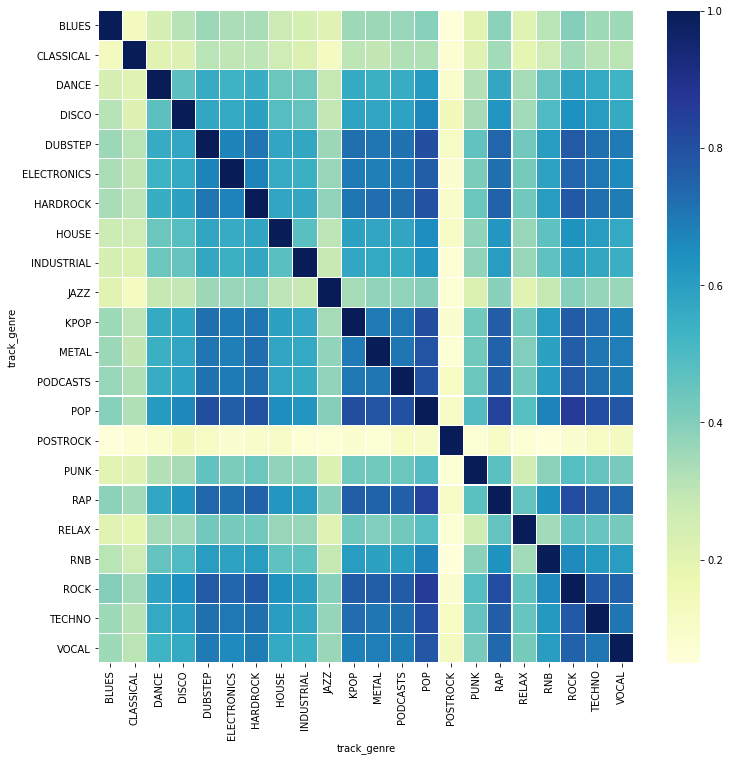

In [ ]:
#корреляционная матрица зависимостей среднего времени прослушивания треков разных жанров
corrmat = table.corr()
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) #пока непонятно что всё это значит

In [ ]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)

In [ ]:
#больше всего треков прослушано в жанре POP, TECHNO на 4 месте (всего треки прослушаны 59 482 раза)
#добавить долю прослушанных треков в стиле техно из всех прослушанных треков
data["track_genre"].value_counts()

POP            149835
ROCK            98126
RAP             77198
TECHNO          59482
HARDROCK        54338
METAL           50725
PODCASTS        49666
KPOP            49418
DUBSTEP         47722
VOCAL           42138
ELECTRONICS     41015
RNB             20509
DISCO           19526
HOUSE           18479
INDUSTRIAL      15735
DANCE           15432
PUNK             8190
RELAX            7593
JAZZ             6283
BLUES            5652
CLASSICAL        4470
POSTROCK          865
Name: track_genre, dtype: int64

In [ ]:
#возможно построить какую-нибудь корреляцию между прослушиванием пользователями треков разных жанров

In [ ]:
#делаем таблицу в разрезе клиент + значения всяких статистик, которые могут быть полезны
#затем возможно берем выбранные факторы, ставим им веса (перед эти нормализовав) и считаем score для каждого клиента, затем сортируем по этому score и выбираем топ-бла-бла

In [ ]:
#возможно стоит обратить внимание на время последнего прослушивания музыки пользователем и сразу исключить тех, кто давно слушал музыку
#то же самое относится к техно (но это неточно)